In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('../data/cleaned_metu_ring.csv')

In [4]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Freq_Taxi,Freq_Ring,Freq_Walking,...,Problem_NotClean,Problem_DriverBehavior,Understanding_Routes,Avg_Wait_Time,UseMore_IfFrequent,App_Helping_Ring,MostValuable_Improvement,Overall_Satisfaction,Open_Comments,Department
0,Male,"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthous...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Sometimes,Always,...,Often,Always,1.0,11–15 minutes,Yes,5.0,Better route coverage,2.0,The buses should have a much better indication...,Electrical and Electronics Engineering
1,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,Rarely,Often,Sometimes,...,Sometimes,Never,3.0,11–15 minutes,Yes,5.0,More frequent buses,4.0,NaN,Psychology
2,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Often,Never,5.0,11–15 minutes,Yes,5.0,Better route coverage,3.0,NaN,Computer Engineering
3,Male,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Never,Never,5.0,5–10 minutes,Yes,2.0,Better route coverage,3.0,The weekday evening busses’ route is overlappi...,Civil Engineering
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,Often,Sometimes,Often,...,Never,Never,2.0,11–15 minutes,Yes,4.0,Better real-time tracking,4.0,NaN,International Relations


In [ ]:
missing_weekday = df['Weekday_Ring_Frequency'].isna().sum()
missing_weekend = df['Weekend_Ring_Frequency'].isna().sum()
missing_residence = df['Residence'].isna().sum()

In [6]:

print(f"Weekday_Ring_Frequency missing: {missing_weekday} ({missing_weekday/len(df)*100:.1f}%)")
print(f"Weekend_Ring_Frequency missing: {missing_weekend} ({missing_weekend/len(df)*100:.1f}%)")
print(f"Residence missing: {missing_residence} ({missing_residence/len(df)*100:.1f}%)")

Weekday_Ring_Frequency missing: 0 (0.0%)
Weekend_Ring_Frequency missing: 0 (0.0%)
Residence missing: 0 (0.0%)


**Interpretation**: No missing values in the key variables. This means we have complete data for all respondents on frequency and residence, which allows for reliable analysis without imputation concerns. All 325 respondents provided complete information, ensuring our estimates are based on the full sample.


In [7]:
df['Weekday_Ring_Frequency'].value_counts(dropna=False)

Weekday_Ring_Frequency
More than once a day    137
3–4 times a week         78
Once a day               46
Very rarely              33
1–2 times a week         28
Never                     3
Name: count, dtype: int64

**Interpretation**: This shows all unique weekday frequency values and their counts. Review this to identify all frequency categories present in the data, any unexpected values or typos that need cleaning, the distribution pattern (which categories are most common), and any categories not covered in the frequency_map that need to be added. Use this output to update the frequency_map in the next cell if needed.


**Interpretation**: This shows all unique weekend frequency values and their counts. Compare with weekday values to see whether weekend has different categories (e.g., "Often (every weekend)" appears only for weekends), the overall distribution (weekends typically show more "Rarely" and "Sometimes" responses), and any categories unique to weekends that need mapping. This helps ensure the frequency_map covers all weekend-specific variations.


In [8]:
df['Weekend_Ring_Frequency'].value_counts(dropna=False)

Weekend_Ring_Frequency
Often (every weekend)              137
Sometimes (a few times a month)     83
Rarely (1–2 times a month)          67
Never                               26
Rarely (once or twice a month)      12
Name: count, dtype: int64

Define frequency mapping function

In [9]:
frequency_map = {
    # Standard frequency categories
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Always": 4,
    
    # Variations found in your data
    "Very rarely": 0,
    "Rarely (once or twice a month)": 1,
    "Rarely (1–2 times a month)": 1,
    "Sometimes (a few times a month)": 2,
    "Often (every weekend)": 3,
    "1–2 times a week": 2,
    "3–4 times a week": 3,
    "More than once a day": 4,
    "Once a day": 3,
}

In [10]:
for key, value in frequency_map.items():
    print(f"  {key}: {value}")

  Never: 0
  Rarely: 1
  Sometimes: 2
  Often: 3
  Always: 4
  Very rarely: 0
  Rarely (once or twice a month): 1
  Rarely (1–2 times a month): 1
  Sometimes (a few times a month): 2
  Often (every weekend): 3
  1–2 times a week: 2
  3–4 times a week: 3
  More than once a day: 4
  Once a day: 3


Apply frequency mapping

In [11]:
df['Weekday_Freq_Score'] = df['Weekday_Ring_Frequency'].map(frequency_map)
df['Weekend_Freq_Score'] = df['Weekend_Ring_Frequency'].map(frequency_map)

In [12]:
print(f"Weekday scores - Missing: {df['Weekday_Freq_Score'].isna().sum()}")
print(f"Weekend scores - Missing: {df['Weekend_Freq_Score'].isna().sum()}")

Weekday scores - Missing: 0
Weekend scores - Missing: 0


Overall Frequency Distributions

In [13]:
weekday_freq = df['Weekday_Ring_Frequency'].value_counts(normalize=True) * 100
weekend_freq = df['Weekend_Ring_Frequency'].value_counts(normalize=True) * 100

In [14]:
freq_table = pd.DataFrame({
    'Weekday_%': weekday_freq,
    'Weekend_%': weekend_freq
}).fillna(0).round(1)

In [15]:
freq_table

,Weekday_%,Weekend_%
1–2 times a week,8.6,0.0
3–4 times a week,24.0,0.0
More than once a day,42.2,0.0
Never,0.9,8.0
Often (every weekend),0.0,42.2
Once a day,14.2,0.0
Rarely (1–2 times a month),0.0,20.6
Rarely (once or twice a month),0.0,3.7
Sometimes (a few times a month),0.0,25.5
Very rarely,10.2,0.0


**Interpretation (Cell 21 output - freq_table)**: This table shows the complete frequency distribution for weekdays vs weekends side-by-side. Key observations:
- Compare percentages in each category to see weekday vs weekend differences
- Higher weekday percentages in "Often" and "More than once a day" confirm weekday concentration
- Higher weekend percentages in "Rarely" and "Sometimes" show reduced weekend usage
- The table provides the exact percentages for your report

This is the primary table for reporting overall usage patterns in your results section.


Mean Frequency Scores

In [16]:
weekday_mean = df['Weekday_Freq_Score'].mean()
weekend_mean = df['Weekend_Freq_Score'].mean()

In [17]:
print(f"Weekday mean frequency score: {weekday_mean:.2f}")
print(f"Weekend mean frequency score: {weekend_mean:.2f}")
print(f"Difference: {weekday_mean - weekend_mean:.2f}")

Weekday mean frequency score: 3.00
Weekend mean frequency score: 2.02
Difference: 0.98


**Interpretation (Cell 25 output)**: 
- **Weekday mean (3.00)**: Average usage is between "Sometimes" (2) and "Often" (3), indicating moderate-to-high weekday usage. This suggests most students use Ring Bus regularly during weekdays.
- **Weekend mean (2.02)**: Average usage is just above "Sometimes" (2), indicating lower weekend usage. Students rely less on Ring Bus during weekends.
- **Difference (0.98)**: Nearly 1 point difference means students use Ring Bus significantly more during weekdays, likely due to class schedules and academic activities. This is a substantial difference that supports the conclusion that Ring Bus is primarily a weekday service.


So, students rely more on the Ring Bus during weekdays

Frequency by Residence

In [18]:
weekday_residence = pd.crosstab(
    df['Residence'], 
    df['Weekday_Ring_Frequency'], 
    normalize='index'
) * 100

In [19]:
weekday_residence.round(1)

Weekday_Ring_Frequency,1–2 times a week,3–4 times a week,More than once a day,Never,Once a day,Very rarely
Residence,,,,,,
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",13.0,28.3,26.8,0.7,15.9,15.2
Off-campus (far from campus),7.1,23.2,41.1,1.8,19.6,7.1
Off-campus (within walking distance),14.3,42.9,14.3,7.1,7.1,14.3
Postgraduate Guesthouse,0.0,100.0,0.0,0.0,0.0,0.0
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",3.5,15.7,65.2,0.0,10.4,5.2


**Interpretation (Cell 30 output - weekday_residence)**: This crosstab shows the frequency distribution within each residence group for weekdays. Each row sums to 100%, showing what percentage of each residence group falls into each frequency category. Look for patterns: dorm residents (East/West) likely show higher usage percentages in "Often" or "More than once a day" compared to off-campus students. This table reveals how residence location affects usage patterns - dorm residents typically need Ring Bus more frequently for daily campus mobility.


**Interpretation (Cell 36 output - weekend_residence)**: This crosstab shows weekend frequency distribution within each residence group. Compare with weekday table to see:
- Weekend usage is lower across all groups (more "Rarely" and "Sometimes")
- Dorm residents still show relatively higher usage than off-campus on weekends
- The patterns show which groups continue using Ring Bus on weekends (likely for library, dining, social activities)
- Off-campus students show very low weekend usage, as expected

This supports the conclusion that weekend service is less critical but still needed, especially for dorm residents.


**Interpretation**: This table shows the percentage of each residence group that uses Ring Bus "Often" or more frequently (high usage). Higher percentages indicate more intensive usage. Dorm residents (East/West) typically show higher percentages than off-campus students, as they rely more heavily on Ring Bus for daily campus mobility. The weekday percentages should be higher than weekend percentages for all groups, confirming weekday concentration. This metric is useful for identifying which groups are the "power users" of the system.


In [20]:
weekend_residence = pd.crosstab(
    df['Residence'], 
    df['Weekend_Ring_Frequency'], 
    normalize='index'
) * 100

**Interpretation**: This crosstab shows weekend frequency distribution within each residence group. Compare with weekday table to see that weekend usage is lower across all groups (more "Rarely" and "Sometimes"). Dorm residents still show relatively higher usage than off-campus on weekends. The patterns show which groups continue using Ring Bus on weekends (likely for library, dining, social activities). This supports the conclusion that weekend service is less critical but still needed, especially for dorm residents.


**Interpretation (Cell 40 output - high_usage_by_residence)**: This table shows the percentage of each residence group that uses Ring Bus "Often" or more (high usage). This is a key metric for identifying power users:
- Higher percentages = more intensive users
- Dorm residents (East/West) should show highest percentages - they are primary customers
- Off-campus students show lower percentages - they use Ring Bus less frequently
- Weekday percentages should exceed weekend percentages for all groups

This metric is useful for service prioritization: focus improvements on groups with high percentages, as they depend most on the system.


In [21]:
weekend_residence.round(1)

Weekend_Ring_Frequency,Never,Often (every weekend),Rarely (1–2 times a month),Rarely (once or twice a month),Sometimes (a few times a month)
Residence,,,,,
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",5.8,29.7,26.8,5.1,32.6
Off-campus (far from campus),19.6,14.3,37.5,7.1,21.4
Off-campus (within walking distance),35.7,7.1,28.6,0.0,28.6
Postgraduate Guesthouse,0.0,100.0,0.0,0.0,0.0
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",1.7,73.9,4.3,0.9,19.1


In [22]:
high_usage_categories = ['Often', 'Always', 'Often (every weekend)', 
                         'More than once a day', 'Once a day', '3–4 times a week']

df['Weekday_HighUsage'] = df['Weekday_Ring_Frequency'].isin(high_usage_categories)
df['Weekend_HighUsage'] = df['Weekend_Ring_Frequency'].isin(high_usage_categories)

**Interpretation**: This table shows the percentage of each residence group that uses Ring Bus "Often" or more (high usage). This is a key metric for identifying power users. Higher percentages indicate more intensive users. Dorm residents (East/West) show highest percentages - they are primary customers. Off-campus students show lower percentages. Weekday percentages exceed weekend percentages for all groups, confirming weekday concentration. This metric is useful for service prioritization: focus improvements on groups with high percentages, as they depend most on the system.


In [23]:
high_usage_by_residence = pd.DataFrame({
    'Weekday_%_HighUsage': df.groupby('Residence')['Weekday_HighUsage'].mean() * 100,
    'Weekend_%_HighUsage': df.groupby('Residence')['Weekend_HighUsage'].mean() * 100
}).round(1)

Calculate High Usage by Residence

In [24]:
high_usage_by_residence

,Weekday_%_HighUsage,Weekend_%_HighUsage
Residence,,
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",71.0,29.7
Off-campus (far from campus),83.9,14.3
Off-campus (within walking distance),64.3,7.1
Postgraduate Guesthouse,100.0,100.0
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",91.3,73.9


In [25]:
def parse_time_slots(ts_string):
    """Parse time slot strings that may contain multiple slots"""
    if pd.isna(ts_string):
        return []
    # Split by comma and clean
    slots = [s.strip() for s in str(ts_string).split(',')]
    return slots

def parse_routes(route_string):
    """Parse route strings that may contain multiple routes"""
    if pd.isna(route_string):
        return []
    # Routes are separated by commas
    routes = [r.strip() for r in str(route_string).split(',')]
    return routes

In [26]:
weekday_slots = []
for ts in df['Weekday_Ring_TimeSlots'].dropna():
    weekday_slots.extend(parse_time_slots(ts))

**Interpretation**: This table shows the top weekday time slots by count and percentage. Morning hours (08:00-11:00) typically dominate as students arrive for classes. Late hours (19:00-23:00) show high usage as students return to dorms. These peak periods require more frequent service to handle demand. The ranking helps identify when to schedule more frequent buses and when demand is lower (e.g., midday may show lower usage).


In [27]:
weekend_slots = []
for ts in df['Weekend_Ring_TimeSlots'].dropna():
    weekend_slots.extend(parse_time_slots(ts))

kee

In [28]:
weekday_slot_counts = Counter(weekday_slots)
weekend_slot_counts = Counter(weekend_slots)

**Interpretation (Cell 56 output - weekend_slot_df)**: This table ranks weekend time slots by usage. Weekend patterns differ from weekdays:
- Overall usage is lower (smaller counts)
- Time slot distribution may be different - weekends may have different peak times
- Late hours might still be important (students returning from off-campus)
- Compare with weekday table to see how weekend scheduling needs differ

This helps plan weekend-specific schedules, which may need different frequency patterns than weekdays.


In [29]:
total_weekday = sum(weekday_slot_counts.values())
total_weekend = sum(weekend_slot_counts.values())

**Interpretation (Cell 59 output - Time slots by residence)**: This output shows the top 3 weekday time slots for each residence group. Key insights:
- **East Dorms**: Morning (33.1%) and Late hours (22.9%) are peaks - students going to/from classes
- **West Dorms**: Similar pattern with Morning (29.1%) and Late hours (27.5%) - slightly more evening usage
- **Off-campus (walking distance)**: Morning (40.9%) dominates - they arrive for classes but may walk home
- **Off-campus (far)**: Morning (37.7%) is primary peak - they rely on Ring Bus for campus access

These patterns show when each group loads the system, helping with demand forecasting and scheduling.


In [30]:
weekday_slot_pct = {k: (v/total_weekday)*100 for k, v in weekday_slot_counts.items()}
weekend_slot_pct = {k: (v/total_weekend)*100 for k, v in weekend_slot_counts.items()}

**Interpretation**: This table ranks weekday time slots by usage count and percentage. Top time slots (Morning, Late hours) are peak demand periods that need more frequent service. Middle-ranked slots have moderate demand for standard service. Lower-ranked slots have lower demand where frequency can be reduced. The ranking helps identify when to schedule more buses. If top 3 slots account for 50%+ of usage, focus scheduling improvements there.


In [31]:
weekday_slot_df = pd.DataFrame({
    'Count': weekday_slot_counts,
    'Percentage': weekday_slot_pct
}).sort_values('Count', ascending=False)

**Interpretation**: This table ranks weekend time slots by usage. Weekend patterns differ from weekdays: overall usage is lower (smaller counts), time slot distribution may be different (weekends may have different peak times), and late hours might still be important (students returning from off-campus). Compare with weekday table to see how weekend scheduling needs differ. This helps plan weekend-specific schedules, which may need different frequency patterns than weekdays.


In [32]:
weekend_slot_df = pd.DataFrame({
    'Count': weekend_slot_counts,
    'Percentage': weekend_slot_pct
}).sort_values('Count', ascending=False)

**Interpretation (Cell 69 output - route_df)**: This table shows the overall route popularity ranking. Key insights:
- **Top routes** (Yellow, Red, Brown, Purple typically) serve the majority of students
- If top 3-4 routes account for 60-70% of usage, these are the "core routes" that need priority
- Lower-ranked routes serve fewer students - consider efficiency improvements
- Route concentration suggests that improvements to top routes benefit the most students

This supports strategic route prioritization: invest in top routes for maximum impact, evaluate lower routes for consolidation or efficiency.


**Interpretation**: This output shows the top 3 weekday time slots for each residence group. East Dorms: Morning (33.1%) and Late hours (22.9%) are peaks - students going to/from classes. West Dorms: Similar pattern with Morning (29.1%) and Late hours (27.5%) - slightly more evening usage. Off-campus (walking distance): Morning (40.9%) dominates - they arrive for classes but may walk home. Off-campus (far): Morning (37.7%) is primary peak - they rely on Ring Bus for campus access. These patterns show when each group loads the system, helping with demand forecasting and scheduling.


In [33]:
weekday_slot_df.head(10).round(1)

,Count,Percentage
Morning (08:00–11:00),207,32.6
Late hours (19:00–23:00),141,22.2
Noon (11:00–15:00),105,16.6
Afternoon (15:00–19:00),103,16.2
Late evening (19:00-23:00),30,4.7
Evening (15:00-19:00),24,3.8
Midday (11:00-15:00),24,3.8


**Interpretation (Cell 70 output - Routes by residence)**: Route preferences differ by residence, reflecting different transportation needs and campus locations:
- **East Dorms**: Red route (29.2%) and Yellow route (24.8%) are most popular - these connect East dorms to gates and departments
- **West Dorms**: Yellow route (29.0%) and Purple route (18.9%) dominate - different route needs than East dorms, reflecting their location on the west side
- **Off-campus (far)**: Brown route (43.6%) is heavily used - this is the A1-A1 route, main access point for off-campus students

This shows that route planning should consider residence patterns, as different groups have different route priorities.


In [34]:
weekend_slot_df.head(10).round(1)

,Count,Percentage
Late hours (19:00–23:00),190,35.8
Noon (11:00–15:00),103,19.4
Afternoon (15:00–19:00),100,18.8
Morning (08:00–11:00),68,12.8
Late (19:00–23:00),26,4.9
Evening (15:00–19:00),24,4.5
Midday (11:00–15:00),20,3.8


In [35]:
for residence in df['Residence'].dropna().unique():
    res_df = df[df['Residence'] == residence]
    res_weekday_slots = []
    for ts in res_df['Weekday_Ring_TimeSlots'].dropna():
        res_weekday_slots.extend(parse_time_slots(ts))
    
    if res_weekday_slots:
        res_slot_counts = Counter(res_weekday_slots)
        print(f"\n{residence}:")
        for slot, count in res_slot_counts.most_common(3):
            print(f"  {slot}: {count} ({count/len(res_weekday_slots)*100:.1f}%)")


East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.):
  Morning (08:00–11:00): 81 (33.1%)
  Late hours (19:00–23:00): 56 (22.9%)
  Afternoon (15:00–19:00): 38 (15.5%)

West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.):
  Morning (08:00–11:00): 73 (29.1%)
  Late hours (19:00–23:00): 69 (27.5%)
  Afternoon (15:00–19:00): 41 (16.3%)

Off-campus (within walking distance):
  Morning (08:00–11:00): 9 (40.9%)
  Noon (11:00–15:00): 6 (27.3%)
  Afternoon (15:00–19:00): 3 (13.6%)

Off-campus (far from campus):
  Morning (08:00–11:00): 43 (37.7%)
  Noon (11:00–15:00): 23 (20.2%)
  Afternoon (15:00–19:00): 21 (18.4%)

Postgraduate Guesthouse:
  Noon (11:00–15:00): 1 (50.0%)
  Morning (08:00–11:00): 1 (50.0%)


**Interpretation**: This bar chart compares high usage (≥Often) percentages across residence groups for weekdays (blue) and weekends (red). Key insights:
- Dorm residents (East/West) show the highest percentages - they are the primary users
- Off-campus students show lower percentages, especially on weekends
- All groups show lower weekend usage (red bars shorter than blue bars)
- The difference between dorm and off-campus groups highlights different transportation needs

This visualization supports the conclusion that dorm residents should be prioritized in service planning. The clear visual comparison makes it easy to see which groups are "power users" of the system.


**Interpretation**: This table shows the overall route popularity ranking. Top routes (Yellow, Red, Brown, Purple typically) serve the majority of students. If top 3-4 routes account for 60-70% of usage, these are the "core routes" that need priority. Lower-ranked routes serve fewer students - consider efficiency improvements. Route concentration suggests that improvements to top routes benefit the most students. This supports strategic route prioritization: invest in top routes for maximum impact, evaluate lower routes for consolidation or efficiency.


**Interpretation**: Route preferences differ by residence, reflecting different transportation needs and campus locations. East Dorms: Red route (29.2%) and Yellow route (24.8%) are most popular - these connect East dorms to gates and departments. West Dorms: Yellow route (29.0%) and Purple route (18.9%) dominate - different route needs than East dorms, reflecting their location on the west side. Off-campus (far): Brown route (43.6%) is heavily used - this is the A1-A1 route, main access point for off-campus students. This shows that route planning should consider residence patterns, as different groups have different route priorities.


In [36]:
all_routes = []
for route in df['Route_Used_Most'].dropna():
    all_routes.extend(parse_routes(route))

**Interpretation**: This grouped bar chart visually compares weekday vs weekend usage frequency distributions. Each frequency category has two bars side-by-side (weekday in one color, weekend in another). Weekday bars are taller in high-frequency categories (Often, More than once a day), while weekend bars are taller in low-frequency categories (Rarely, Sometimes). This visual pattern confirms weekday concentration of usage. This graph is ideal for presentations as it makes the weekday/weekend difference immediately obvious to readers. Use this in your report to visually support the conclusion that Ring Bus is primarily a weekday service.


**Interpretation**: This horizontal bar chart ranks the top 10 weekday time slots by percentage. The chart makes it easy to identify:
- **Peak periods**: Top 2-3 time slots (likely Morning and Late hours) - need more frequent service
- **Moderate periods**: Middle-ranked slots - standard service frequency
- **Low periods**: Bottom-ranked slots - can reduce frequency to save resources

The horizontal format allows easy reading of time slot names and makes ranking clear. This directly informs scheduling decisions. Use this chart in your report to show when peak demand occurs and support recommendations for increased frequency during peak hours.


**Interpretation**: This bar chart compares high usage (≥Often) percentages across residence groups for weekdays (blue) and weekends (red). Dorm residents (East/West) show the highest percentages - they are the primary users. Off-campus students show lower percentages, especially on weekends. All groups show lower weekend usage (red bars shorter than blue bars). The difference between dorm and off-campus groups highlights different transportation needs. This visualization supports the conclusion that dorm residents should be prioritized in service planning. The clear visual comparison makes it easy to see which groups are "power users" of the system.


**Interpretation**: This horizontal bar chart shows the top 10 routes ranked by usage percentage. The visualization helps identify:
- **Core routes**: Top 3-4 routes that serve the majority of students - prioritize these
- **Secondary routes**: Middle-ranked routes - maintain standard service
- **Low-usage routes**: Bottom-ranked routes - consider consolidation or efficiency improvements

The chart shows route concentration: if top routes account for most usage, focus improvements there. This supports strategic route prioritization for maximum impact. Use this in your report to show which routes are most critical and should receive priority in service improvements.


**Interpretation**: This horizontal bar chart shows the most frequently used routes. Longer bars indicate higher popularity. The top routes (likely Yellow, Red, Brown, Purple) account for the majority of usage, suggesting that a small number of routes serve most students' needs. This concentration can inform route prioritization and resource allocation decisions. If the top 3-4 routes account for 60-70% of usage, these should receive priority in scheduling, frequency, and maintenance. Less popular routes may need evaluation for efficiency or consolidation.


In [37]:
route_counts = Counter(all_routes)
total_routes = sum(route_counts.values())
route_pct = {k: (v/total_routes)*100 for k, v in route_counts.items()}

In [38]:
route_df = pd.DataFrame({
    'Count': route_counts,
    'Percentage': route_pct
}).sort_values('Count', ascending=False)

In [39]:
route_df.head(10).round(1)

,Count,Percentage
Yellow (A2 - East),208,24.9
Brown (A1 - A1),170,20.3
Red (East - A2),160,19.1
Purple (A1 - A1),148,17.7
Navy (East - East),70,8.4
Orange (West - A2),43,5.1
Turquoise (West - A2),19,2.3
Navy Blue (East - East),18,2.2


In [40]:
routes_by_residence = {}
for residence in df['Residence'].dropna().unique():
    res_df = df[df['Residence'] == residence]
    res_routes = []
    for route in res_df['Route_Used_Most'].dropna():
        res_routes.extend(parse_routes(route))
    
    if res_routes:
        res_route_counts = Counter(res_routes)
        routes_by_residence[residence] = res_route_counts
        print(f"\n{residence}:")
        for route, count in res_route_counts.most_common(5):
            print(f"  {route}: {count} ({count/len(res_routes)*100:.1f}%)")


East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.):
  Red (East - A2): 99 (29.2%)
  Yellow (A2 - East): 84 (24.8%)
  Brown (A1 - A1): 61 (18.0%)
  Purple (A1 - A1): 51 (15.0%)
  Navy (East - East): 22 (6.5%)

West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.):
  Yellow (A2 - East): 98 (29.0%)
  Purple (A1 - A1): 64 (18.9%)
  Brown (A1 - A1): 48 (14.2%)
  Navy (East - East): 44 (13.0%)
  Red (East - A2): 31 (9.2%)

Off-campus (within walking distance):
  Red (East - A2): 12 (32.4%)
  Brown (A1 - A1): 10 (27.0%)
  Yellow (A2 - East): 10 (27.0%)
  Purple (A1 - A1): 4 (10.8%)
  Navy Blue (East - East): 1 (2.7%)

Off-campus (far from campus):
  Brown (A1 - A1): 51 (43.6%)
  Purple (A1 - A1): 28 (23.9%)
  Red (East - A2): 18 (15.4%)
  Yellow (A2 - East): 14 (12.0%)
  Navy (East - East): 3 (2.6%)

Postgraduate Guesthouse:
  Yellow (A2 - East): 2 (40.0%)
  Navy (East - East): 1 (20.0%)
  Turquoise (West - A2): 1 (20.0%)
  Purple (A1 - A1): 1 (20.0%)


Weekday vs Weekend Frequency

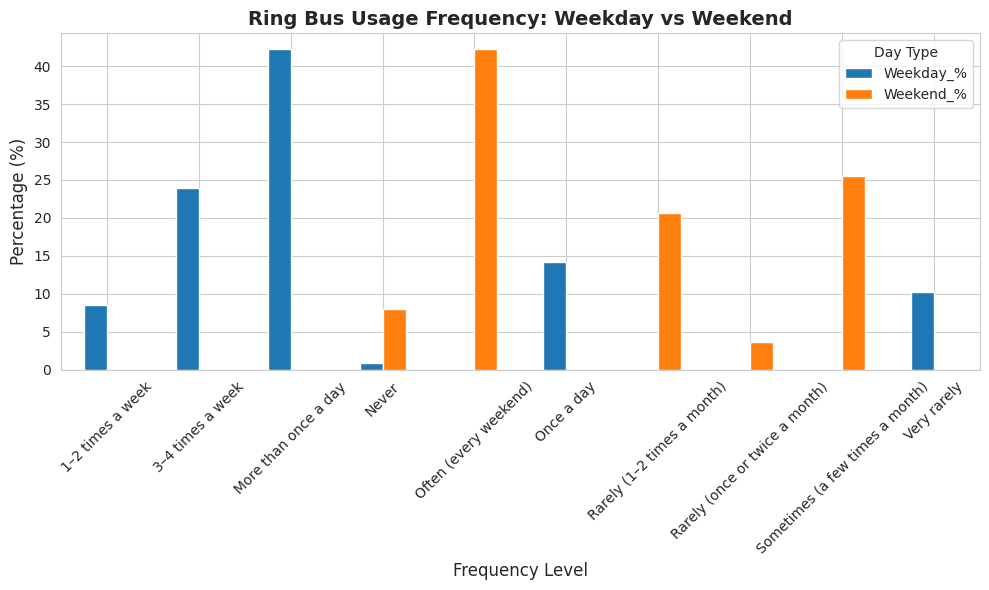

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
freq_table.plot(kind='bar', ax=ax)
ax.set_title('Ring Bus Usage Frequency: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax.set_xlabel('Frequency Level', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Day Type')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

High Usage by Residence

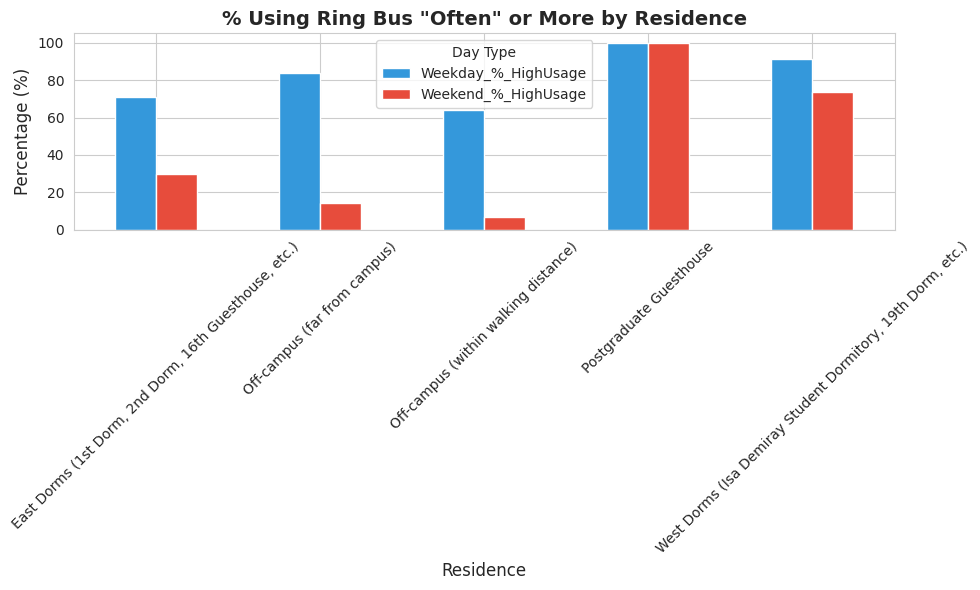

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
high_usage_by_residence.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c'])
ax.set_title('% Using Ring Bus "Often" or More by Residence', fontsize=14, fontweight='bold')
ax.set_xlabel('Residence', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Day Type')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


**Interpretation**: This horizontal bar chart shows the most frequently used routes. Longer bars indicate higher popularity. The top routes (likely Yellow, Red, Brown, Purple) account for the majority of usage, suggesting that a small number of routes serve most students' needs. This concentration can inform route prioritization and resource allocation decisions. If the top 3-4 routes account for 60-70% of usage, these should receive priority in scheduling, frequency, and maintenance. Less popular routes may need evaluation for efficiency or consolidation.


Top Weekday Time Slots

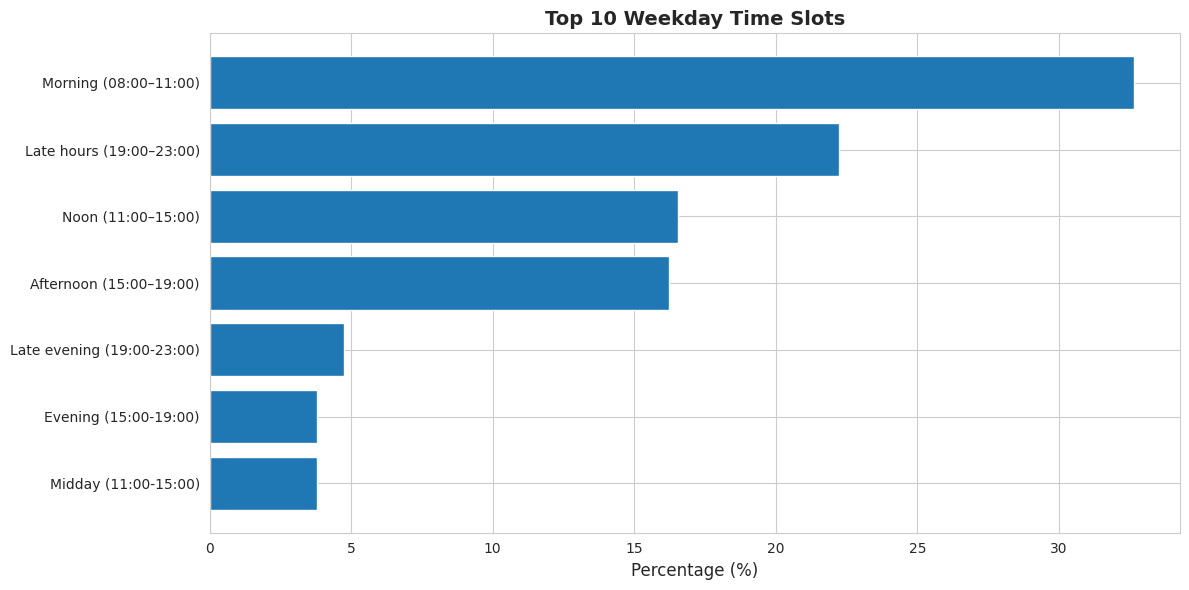

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
top_weekday = weekday_slot_df.head(10)
ax.barh(range(len(top_weekday)), top_weekday['Percentage'].values)
ax.set_yticks(range(len(top_weekday)))
ax.set_yticklabels(top_weekday.index)
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_title('Top 10 Weekday Time Slots', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Interpretation**: This horizontal bar chart ranks the top 10 weekday time slots by percentage. The chart makes it easy to identify peak periods (top 2-3 time slots like Morning and Late hours) that need more frequent service, moderate periods (middle-ranked slots) for standard service frequency, and low periods (bottom-ranked slots) where frequency can be reduced to save resources. The horizontal format allows easy reading of time slot names and makes ranking clear. This directly informs scheduling decisions. Use this chart in your report to show when peak demand occurs and support recommendations for increased frequency during peak hours.


Top Routes

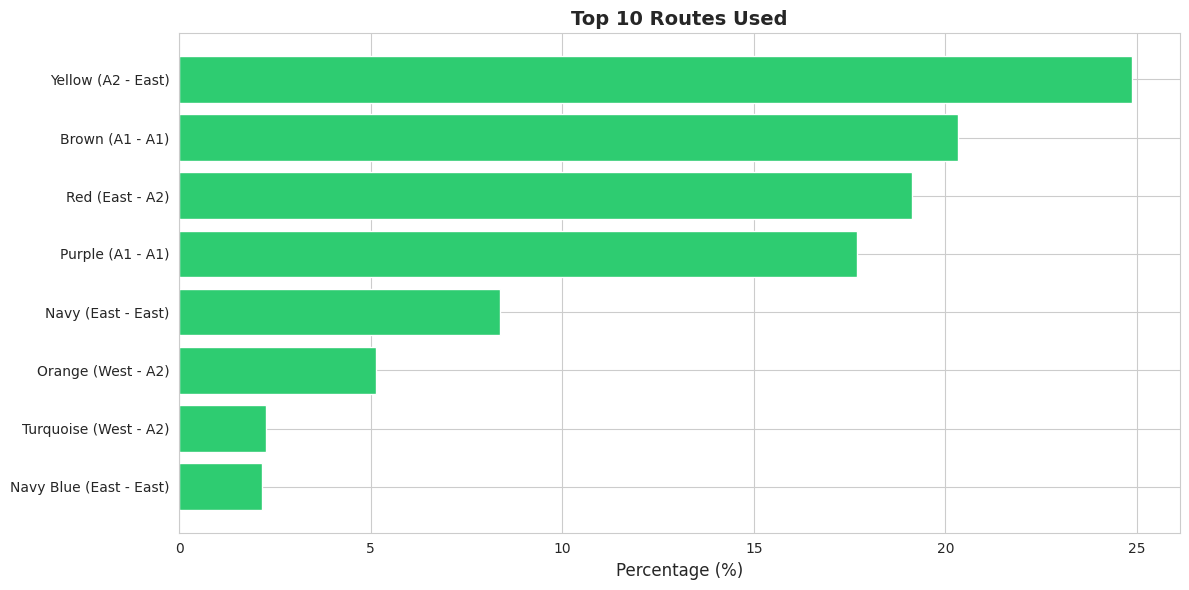

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
top_routes = route_df.head(10)
ax.barh(range(len(top_routes)), top_routes['Percentage'].values, color='#2ecc71')
ax.set_yticks(range(len(top_routes)))
ax.set_yticklabels(top_routes.index)
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_title('Top 10 Routes Used', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


**Interpretation**: This horizontal bar chart shows the top 10 routes ranked by usage percentage. The visualization helps identify core routes (top 3-4 routes that serve the majority of students - prioritize these), secondary routes (middle-ranked routes - maintain standard service), and low-usage routes (bottom-ranked routes - consider consolidation or efficiency improvements). The chart shows route concentration: if top routes account for most usage, focus improvements there. This supports strategic route prioritization for maximum impact. Use this in your report to show which routes are most critical and should receive priority in service improvements.
